## Pengambilan Data

## Load Library

In [19]:
import pandas as pd
import time
import tweepy
import numpy as np

## Login

In [20]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    
    # Autentikasi dan akses menggunakan keys
    auth = tweepy.OAuthHandler("5SciYdsih97OtDTKgF2uKHVYF", 
    "q7ZFbgh2lbvwYNWzrVRvJJVD2iIyG3eTJr6TVwlNFCskhtCLq1")
    auth.set_access_token("1267078093505564672-ZIhrpO4Zo3PI1BEYTqYqglJw0437Hw", 
    "okuvszLK4RStLBZbnwaDRFGqPdYEYrSitfFwRRVmAYoG6")
    
    # Kembalikan akses ke API
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [21]:
# buat extractor object
extractor = twitter_config()


Authentication OK


## Ambil tweet

In [22]:
tweets = extractor.user_timeline(screen_name="asumsico", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 100.

5 tweet teratas:

Majelis Hakim Pengadilan Negeri Jakarta Selatan menolak nota keberatan atau eksepsi Ferdy Sambo atas dakwaan dugaan… https://t.co/F0PBPQXcVe

Seorang pecinta sepak bola, Santiago Sanchez hilang di Iran. Ia dilaporkan menghilang dalam perjalanannya dari Madr… https://t.co/CzuckjdE0V

Sepakat atau enggak dengan penilaian BEM UI yang bilang Joko Widodo-Ma'ruf Amin belum menunaikan janji-janji politi… https://t.co/lFSftadoTd

Dalam melancarkan aksinya, sang peretas turut membubuhkan narasi mengenai dugaan pelecehan seksual yang terjadi di… https://t.co/6OsBAdQjuq

Ketinggian air di banjir Jakarta Timur mencapai 50-80 sentimeter (cm). Banjir akibat luapan Kali Item dan Kali Cili… https://t.co/2Zl0E9pC0Y



## Data Frame

In [23]:
#Membuat kerangka data sebagai berikut:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

#Membuat tampilan kerangka data:
display(dataset.head(100))

,Tweets
0,Majelis Hakim Pengadilan Negeri Jakarta Selata...
1,"Seorang pecinta sepak bola, Santiago Sanchez h..."
2,Sepakat atau enggak dengan penilaian BEM UI ya...
3,"Dalam melancarkan aksinya, sang peretas turut ..."
4,Ketinggian air di banjir Jakarta Timur mencapa...
...,...
95,Korban meninggal dunia tersebut bernama FDK (2...
96,Australia menyebut gugusan Pulau Pasir sebagai...
97,Pelaku tertangkap pada Minggu sore di kawasan ...
98,"Kepala BPOM Penny Lukito menjelaskan, masih ad..."


## Simpan csv

In [25]:
dataset.to_csv('dataset_user_label.csv',sep=';')

## Pengolahan Dataset
## load library

In [26]:
import re
import string
import time
from copy import deepcopy
import pandas as pd

## Load Dataset

In [27]:
df = pd.read_csv('dataset_user_label.csv',sep=';')
df.head()

,Unnamed: 0,Tweets,label
0,0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1
1,1,"Seorang pecinta sepak bola, Santiago Sanchez h...",0
2,2,Sepakat atau enggak dengan penilaian BEM UI ya...,1
3,3,"Dalam melancarkan aksinya, sang peretas turut ...",0
4,4,Ketinggian air di banjir Jakarta Timur mencapa...,0


## Instalasi Package Ekpharasis

In [46]:
!pip install ekphrasis

## penataan data

In [28]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


## Membuat Fungsi dengan membersihkan elemen yang tidak penting

In [29]:
# panggil ekphrasis

def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
# fungsi dari AMS 01-03. silakan cek bagaimana saya merubah menjadi fungsi

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

## Memanggil Fungsi

In [30]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [31]:
df["step01"] = final_string
df.head()

,Unnamed: 0,Tweets,label,step01
0,0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1,majelis hakim pengadilan negeri jakarta selata...
1,1,"Seorang pecinta sepak bola, Santiago Sanchez h...",0,seorang pecinta sepak bola santiago sanchez hi...
2,2,Sepakat atau enggak dengan penilaian BEM UI ya...,1,sepakat atau enggak dengan penilaian bem ui ya...
3,3,"Dalam melancarkan aksinya, sang peretas turut ...",0,dalam melancarkan aksinya sang peretas turut m...
4,4,Ketinggian air di banjir Jakarta Timur mencapa...,0,ketinggian air di banjir jakarta timur mencapa...


## Menghapus Data Kosong

In [32]:
df.info()
df_hapus = df[~df['step01'].str.contains(" ")]
df_hapus.info()
df_hapus.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   Tweets      100 non-null    object
 2   label       100 non-null    int64 
 3   step01      100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 24 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2 non-null      int64 
 1   Tweets      2 non-null      object
 2   label       2 non-null      int64 
 3   step01      2 non-null      object
dtypes: int64(2), object(2)
memory usage: 80.0+ bytes


,Unnamed: 0,Tweets,label,step01
24,24,https://t.co/HJz44MrrEP,0,cohjzmrrep
76,76,https://t.co/g9fTNvGVrE,0,cogftnvgvre


In [33]:
df_new = df[~df.isin(df_hapus)].dropna()
df_new.info()
df_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  98 non-null     float64
 1   Tweets      98 non-null     object 
 2   label       98 non-null     float64
 3   step01      98 non-null     object 
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


,Unnamed: 0,Tweets,label,step01
0,0.0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1.0,majelis hakim pengadilan negeri jakarta selata...
1,1.0,"Seorang pecinta sepak bola, Santiago Sanchez h...",0.0,seorang pecinta sepak bola santiago sanchez hi...
2,2.0,Sepakat atau enggak dengan penilaian BEM UI ya...,1.0,sepakat atau enggak dengan penilaian bem ui ya...
3,3.0,"Dalam melancarkan aksinya, sang peretas turut ...",0.0,dalam melancarkan aksinya sang peretas turut m...
4,4.0,Ketinggian air di banjir Jakarta Timur mencapa...,0.0,ketinggian air di banjir jakarta timur mencapa...
...,...,...,...,...
95,95.0,Korban meninggal dunia tersebut bernama FDK (2...,0.0,korban meninggal dunia tersebut bernama fdk ...
96,96.0,Australia menyebut gugusan Pulau Pasir sebagai...,0.0,australia menyebut gugusan pulau pasir sebagai...
97,97.0,Pelaku tertangkap pada Minggu sore di kawasan ...,0.0,pelaku tertangkap pada minggu sore di kawasan ...
98,98.0,"Kepala BPOM Penny Lukito menjelaskan, masih ad...",0.0,kepala bpom penny lukito menjelaskan masih ada...


## Normalisasi Kata Slang

In [34]:
# token
import nltk
from nltk.tokenize import word_tokenize 

In [35]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [36]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [37]:
df_new.head(10)

,Unnamed: 0,Tweets,label,step01,tokens
0,0.0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1.0,majelis hakim pengadilan negeri jakarta selata...,"[majelis, hakim, pengadilan, negeri, jakarta, ..."
1,1.0,"Seorang pecinta sepak bola, Santiago Sanchez h...",0.0,seorang pecinta sepak bola santiago sanchez hi...,"[seorang, pecinta, sepak, bola, santiago, sanc..."
2,2.0,Sepakat atau enggak dengan penilaian BEM UI ya...,1.0,sepakat atau enggak dengan penilaian bem ui ya...,"[sepakat, atau, enggak, dengan, penilaian, bem..."
3,3.0,"Dalam melancarkan aksinya, sang peretas turut ...",0.0,dalam melancarkan aksinya sang peretas turut m...,"[dalam, melancarkan, aksinya, sang, peretas, t..."
4,4.0,Ketinggian air di banjir Jakarta Timur mencapa...,0.0,ketinggian air di banjir jakarta timur mencapa...,"[ketinggian, air, di, banjir, jakarta, timur, ..."
5,5.0,"Serangan udara tersebut menewaskan 80 orang, t...",0.0,serangan udara tersebut menewaskan orang ter...,"[serangan, udara, tersebut, menewaskan, orang,..."
6,6.0,Ia mengklarifikasi pernyataan kuasa hukum Brig...,1.0,ia mengklarifikasi pernyataan kuasa hukum brig...,"[ia, mengklarifikasi, pernyataan, kuasa, hukum..."
7,7.0,"Hotman Paris Hutapea, Pengacara Irjen Teddy Mi...",0.0,hotman paris hutapea pengacara irjen teddy min...,"[hotman, paris, hutapea, pengacara, irjen, ted..."
8,8.0,Kajari Serang Freddy D. Simandjuntak mengataka...,0.0,kajari serang freddy simandjuntak mengatakan p...,"[kajari, serang, freddy, simandjuntak, mengata..."
9,9.0,"Geger Komisaris PT Pelni, Dede Budhyarto mempl...",0.0,geger komisaris pt pelni dede budhyarto memple...,"[geger, komisaris, pt, pelni, dede, budhyarto,..."


## Clean kamus

In [38]:
normalized_word = pd.read_csv('kamus_clean.csv')

In [39]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [40]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [41]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [42]:
df_new["step02"] = final_string_tokens
df_new.head(10)

,Unnamed: 0,Tweets,label,step01,tokens,final_tokens,step02
0,0.0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1.0,majelis hakim pengadilan negeri jakarta selata...,"[majelis, hakim, pengadilan, negeri, jakarta, ...","[majelis, hakim, pengadilan, negeri, jakarta, ...",majelis hakim pengadilan negeri jakarta selata...
1,1.0,"Seorang pecinta sepak bola, Santiago Sanchez h...",0.0,seorang pecinta sepak bola santiago sanchez hi...,"[seorang, pecinta, sepak, bola, santiago, sanc...","[seorang, pecinta, sepak, bola, santiago, sanc...",seorang pecinta sepak bola santiago sanchez hi...
2,2.0,Sepakat atau enggak dengan penilaian BEM UI ya...,1.0,sepakat atau enggak dengan penilaian bem ui ya...,"[sepakat, atau, enggak, dengan, penilaian, bem...","[sepakat, atau, enggak, dengan, penilaian, bem...",sepakat atau enggak dengan penilaian bem ui ya...
3,3.0,"Dalam melancarkan aksinya, sang peretas turut ...",0.0,dalam melancarkan aksinya sang peretas turut m...,"[dalam, melancarkan, aksinya, sang, peretas, t...","[dalam, melancarkan, aksinya, sang, peretas, t...",dalam melancarkan aksinya sang peretas turut m...
4,4.0,Ketinggian air di banjir Jakarta Timur mencapa...,0.0,ketinggian air di banjir jakarta timur mencapa...,"[ketinggian, air, di, banjir, jakarta, timur, ...","[ketinggian, air, di, banjir, jakarta, timur, ...",ketinggian air di banjir jakarta timur mencapa...
5,5.0,"Serangan udara tersebut menewaskan 80 orang, t...",0.0,serangan udara tersebut menewaskan orang ter...,"[serangan, udara, tersebut, menewaskan, orang,...","[serangan, udara, tersebut, menewaskan, orang,...",serangan udara tersebut menewaskan orang terma...
6,6.0,Ia mengklarifikasi pernyataan kuasa hukum Brig...,1.0,ia mengklarifikasi pernyataan kuasa hukum brig...,"[ia, mengklarifikasi, pernyataan, kuasa, hukum...","[ia, mengklarifikasi, pernyataan, kuasa, hukum...",ia mengklarifikasi pernyataan kuasa hukum brig...
7,7.0,"Hotman Paris Hutapea, Pengacara Irjen Teddy Mi...",0.0,hotman paris hutapea pengacara irjen teddy min...,"[hotman, paris, hutapea, pengacara, irjen, ted...","[hotman, paris, hutapea, pengacara, irjen, ted...",hotman paris hutapea pengacara irjen teddy min...
8,8.0,Kajari Serang Freddy D. Simandjuntak mengataka...,0.0,kajari serang freddy simandjuntak mengatakan p...,"[kajari, serang, freddy, simandjuntak, mengata...","[kajari, serang, freddy, simandjuntak, mengata...",kajari serang freddy simandjuntak mengatakan p...
9,9.0,"Geger Komisaris PT Pelni, Dede Budhyarto mempl...",0.0,geger komisaris pt pelni dede budhyarto memple...,"[geger, komisaris, pt, pelni, dede, budhyarto,...","[geger, komisaris, pt, pelni, dede, budhyarto,...",geger komisaris pt pelni dede budhyarto memple...


In [43]:
df_new.to_csv('Data Set Bersih.csv',sep=";")

## Stemming dengan sastrawi

## Load sastrawi

In [44]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## Stopwords

In [45]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
### Tuliskan perintahnya disini ???

stopwords_sastrawi = factory.create_stop_word_remover()


In [46]:
df_new['step02'] = df_new['step02'].apply(str)

In [47]:
df_new.head(10)

,Unnamed: 0,Tweets,label,step01,tokens,final_tokens,step02
0,0.0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1.0,majelis hakim pengadilan negeri jakarta selata...,"[majelis, hakim, pengadilan, negeri, jakarta, ...","[majelis, hakim, pengadilan, negeri, jakarta, ...",majelis hakim pengadilan negeri jakarta selata...
1,1.0,"Seorang pecinta sepak bola, Santiago Sanchez h...",0.0,seorang pecinta sepak bola santiago sanchez hi...,"[seorang, pecinta, sepak, bola, santiago, sanc...","[seorang, pecinta, sepak, bola, santiago, sanc...",seorang pecinta sepak bola santiago sanchez hi...
2,2.0,Sepakat atau enggak dengan penilaian BEM UI ya...,1.0,sepakat atau enggak dengan penilaian bem ui ya...,"[sepakat, atau, enggak, dengan, penilaian, bem...","[sepakat, atau, enggak, dengan, penilaian, bem...",sepakat atau enggak dengan penilaian bem ui ya...
3,3.0,"Dalam melancarkan aksinya, sang peretas turut ...",0.0,dalam melancarkan aksinya sang peretas turut m...,"[dalam, melancarkan, aksinya, sang, peretas, t...","[dalam, melancarkan, aksinya, sang, peretas, t...",dalam melancarkan aksinya sang peretas turut m...
4,4.0,Ketinggian air di banjir Jakarta Timur mencapa...,0.0,ketinggian air di banjir jakarta timur mencapa...,"[ketinggian, air, di, banjir, jakarta, timur, ...","[ketinggian, air, di, banjir, jakarta, timur, ...",ketinggian air di banjir jakarta timur mencapa...
5,5.0,"Serangan udara tersebut menewaskan 80 orang, t...",0.0,serangan udara tersebut menewaskan orang ter...,"[serangan, udara, tersebut, menewaskan, orang,...","[serangan, udara, tersebut, menewaskan, orang,...",serangan udara tersebut menewaskan orang terma...
6,6.0,Ia mengklarifikasi pernyataan kuasa hukum Brig...,1.0,ia mengklarifikasi pernyataan kuasa hukum brig...,"[ia, mengklarifikasi, pernyataan, kuasa, hukum...","[ia, mengklarifikasi, pernyataan, kuasa, hukum...",ia mengklarifikasi pernyataan kuasa hukum brig...
7,7.0,"Hotman Paris Hutapea, Pengacara Irjen Teddy Mi...",0.0,hotman paris hutapea pengacara irjen teddy min...,"[hotman, paris, hutapea, pengacara, irjen, ted...","[hotman, paris, hutapea, pengacara, irjen, ted...",hotman paris hutapea pengacara irjen teddy min...
8,8.0,Kajari Serang Freddy D. Simandjuntak mengataka...,0.0,kajari serang freddy simandjuntak mengatakan p...,"[kajari, serang, freddy, simandjuntak, mengata...","[kajari, serang, freddy, simandjuntak, mengata...",kajari serang freddy simandjuntak mengatakan p...
9,9.0,"Geger Komisaris PT Pelni, Dede Budhyarto mempl...",0.0,geger komisaris pt pelni dede budhyarto memple...,"[geger, komisaris, pt, pelni, dede, budhyarto,...","[geger, komisaris, pt, pelni, dede, budhyarto,...",geger komisaris pt pelni dede budhyarto memple...


In [48]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [49]:
df_new.loc[:, ('ProcessedText')] = final_string

In [50]:
df_new.head(10)

,Unnamed: 0,Tweets,label,step01,tokens,final_tokens,step02,ProcessedText
0,0.0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1.0,majelis hakim pengadilan negeri jakarta selata...,"[majelis, hakim, pengadilan, negeri, jakarta, ...","[majelis, hakim, pengadilan, negeri, jakarta, ...",majelis hakim pengadilan negeri jakarta selata...,majelis hakim adil negeri jakarta selatan tola...
1,1.0,"Seorang pecinta sepak bola, Santiago Sanchez h...",0.0,seorang pecinta sepak bola santiago sanchez hi...,"[seorang, pecinta, sepak, bola, santiago, sanc...","[seorang, pecinta, sepak, bola, santiago, sanc...",seorang pecinta sepak bola santiago sanchez hi...,orang cinta sepak bola santiago sanchez hilang...
2,2.0,Sepakat atau enggak dengan penilaian BEM UI ya...,1.0,sepakat atau enggak dengan penilaian bem ui ya...,"[sepakat, atau, enggak, dengan, penilaian, bem...","[sepakat, atau, enggak, dengan, penilaian, bem...",sepakat atau enggak dengan penilaian bem ui ya...,sepakat enggak nilai bem ui bilang joko widodo...
3,3.0,"Dalam melancarkan aksinya, sang peretas turut ...",0.0,dalam melancarkan aksinya sang peretas turut m...,"[dalam, melancarkan, aksinya, sang, peretas, t...","[dalam, melancarkan, aksinya, sang, peretas, t...",dalam melancarkan aksinya sang peretas turut m...,lancar aksi sang retas turut bubuh narasi kena...
4,4.0,Ketinggian air di banjir Jakarta Timur mencapa...,0.0,ketinggian air di banjir jakarta timur mencapa...,"[ketinggian, air, di, banjir, jakarta, timur, ...","[ketinggian, air, di, banjir, jakarta, timur, ...",ketinggian air di banjir jakarta timur mencapa...,tinggi air banjir jakarta timur capai sentimet...
5,5.0,"Serangan udara tersebut menewaskan 80 orang, t...",0.0,serangan udara tersebut menewaskan orang ter...,"[serangan, udara, tersebut, menewaskan, orang,...","[serangan, udara, tersebut, menewaskan, orang,...",serangan udara tersebut menewaskan orang terma...,serang udara sebut tewas orang masuk nyanyi mu...
6,6.0,Ia mengklarifikasi pernyataan kuasa hukum Brig...,1.0,ia mengklarifikasi pernyataan kuasa hukum brig...,"[ia, mengklarifikasi, pernyataan, kuasa, hukum...","[ia, mengklarifikasi, pernyataan, kuasa, hukum...",ia mengklarifikasi pernyataan kuasa hukum brig...,klarifikasi nyata kuasa hukum brigadir kamarud...
7,7.0,"Hotman Paris Hutapea, Pengacara Irjen Teddy Mi...",0.0,hotman paris hutapea pengacara irjen teddy min...,"[hotman, paris, hutapea, pengacara, irjen, ted...","[hotman, paris, hutapea, pengacara, irjen, ted...",hotman paris hutapea pengacara irjen teddy min...,hotman paris hutapea acara irjen teddy minahas...
8,8.0,Kajari Serang Freddy D. Simandjuntak mengataka...,0.0,kajari serang freddy simandjuntak mengatakan p...,"[kajari, serang, freddy, simandjuntak, mengata...","[kajari, serang, freddy, simandjuntak, mengata...",kajari serang freddy simandjuntak mengatakan p...,kajari serang freddy simandjuntak kata tahan l...
9,9.0,"Geger Komisaris PT Pelni, Dede Budhyarto mempl...",0.0,geger komisaris pt pelni dede budhyarto memple...,"[geger, komisaris, pt, pelni, dede, budhyarto,...","[geger, komisaris, pt, pelni, dede, budhyarto,...",geger komisaris pt pelni dede budhyarto memple...,geger komisaris pt pelni dede budhyarto memple...


In [51]:
df_new.to_csv('datase_bersih_part02.csv',sep=";")

## Penutup preprocessing data
bagian ini masuk ke tahap mechine learning

## Mulai Modelling

## Dibagi Menjadi feature and label

In [52]:
dataset_feature = df_new['ProcessedText']

In [54]:
dataset_label = df_new['label']

## cek

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
dataset_label.value_counts()

0.0    79
1.0    19
Name: label, dtype: int64

In [57]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0.0    80.6%
1.0    19.4%
Name: label, dtype: object

<Figure size 864x576 with 0 Axes>

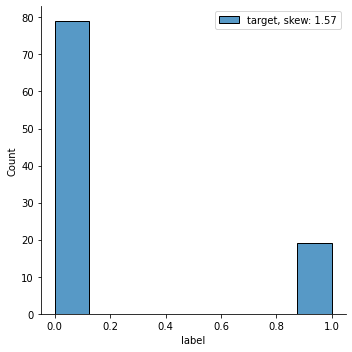

In [58]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

kesimpulan : distribusi data menghasilkan 80,6% untuk non politik dan 19,4% untuk politik

## Fitur ekstraksi menggunakan TF-IDF

## cek label (parameter politik (1) dan non politik (0))

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
vectorizer = TfidfVectorizer()

In [62]:
politik_reviews = df_new[(df_new["label"] == 1)]
npolitik_reviews = df_new[(df_new["label"] == 0)]
politik_reviews.head (10)

,Unnamed: 0,Tweets,label,step01,tokens,final_tokens,step02,ProcessedText
0,0.0,Majelis Hakim Pengadilan Negeri Jakarta Selata...,1.0,majelis hakim pengadilan negeri jakarta selata...,"[majelis, hakim, pengadilan, negeri, jakarta, ...","[majelis, hakim, pengadilan, negeri, jakarta, ...",majelis hakim pengadilan negeri jakarta selata...,majelis hakim adil negeri jakarta selatan tola...
2,2.0,Sepakat atau enggak dengan penilaian BEM UI ya...,1.0,sepakat atau enggak dengan penilaian bem ui ya...,"[sepakat, atau, enggak, dengan, penilaian, bem...","[sepakat, atau, enggak, dengan, penilaian, bem...",sepakat atau enggak dengan penilaian bem ui ya...,sepakat enggak nilai bem ui bilang joko widodo...
6,6.0,Ia mengklarifikasi pernyataan kuasa hukum Brig...,1.0,ia mengklarifikasi pernyataan kuasa hukum brig...,"[ia, mengklarifikasi, pernyataan, kuasa, hukum...","[ia, mengklarifikasi, pernyataan, kuasa, hukum...",ia mengklarifikasi pernyataan kuasa hukum brig...,klarifikasi nyata kuasa hukum brigadir kamarud...
10,10.0,"Juru Bicara Kementerian Perhubungan, Adita Ira...",1.0,juru bicara kementerian perhubungan adita iraw...,"[juru, bicara, kementerian, perhubungan, adita...","[juru, bicara, kementerian, perhubungan, adita...",juru bicara kementerian perhubungan adita iraw...,juru bicara menteri hubung adita irawati aku j...
23,23.0,Menteri Badan Usaha Milik Negara (BUMN) Erick ...,1.0,menteri badan usaha milik negara bumn erick th...,"[menteri, badan, usaha, milik, negara, bumn, e...","[menteri, badan, usaha, milik, negara, bumn, e...",menteri badan usaha milik negara bumn erick th...,menteri badan usaha milik negara bumn erick th...
30,30.0,Ganjar Pranowo berhasil meraup suara NasDem.Â ...,1.0,ganjar pranowo berhasil meraup suara nasdem an...,"[ganjar, pranowo, berhasil, meraup, suara, nas...","[ganjar, pranowo, berhasil, meraup, suara, nas...",ganjar pranowo berhasil meraup suara nasdem an...,ganjar pranowo hasil raup suara nasdem anies t...
34,34.0,Dewan Kolonel disebut-sebut sebagai wadah bagi...,1.0,dewan kolonel disebut sebut sebagai wadah bagi...,"[dewan, kolonel, disebut, sebut, sebagai, wada...","[dewan, kolonel, disebut, sebut, sebagai, wada...",dewan kolonel disebut sebut sebagai wadah bagi...,dewan kolonel sebut sebut wadah dukung puan ma...
35,35.0,"Kuasa Hukum keluarga Brigadir J, Kamaruddin Si...",1.0,kuasa hukum keluarga brigadir kamaruddin siman...,"[kuasa, hukum, keluarga, brigadir, kamaruddin,...","[kuasa, hukum, keluarga, brigadir, kamaruddin,...",kuasa hukum keluarga brigadir kamaruddin siman...,kuasa hukum keluarga brigadir kamaruddin siman...
54,54.0,Penjabat (Pj) Gubernur DKI Jakarta Heru Budi H...,1.0,penjabat pj gubernur dki jakarta heru budi har...,"[penjabat, pj, gubernur, dki, jakarta, heru, b...","[penjabat, pj, gubernur, dki, jakarta, heru, b...",penjabat pj gubernur dki jakarta heru budi har...,jabat pj gubernur dki jakarta heru budi harton...
55,55.0,Rishi Sunak menjadi PM Inggris. Karir politik ...,1.0,rishi sunak menjadi pm inggris karir politik r...,"[rishi, sunak, menjadi, pm, inggris, karir, po...","[rishi, sunak, menjadi, pm, inggris, karir, po...",rishi sunak menjadi pm inggris karir politik r...,rishi sunak jadi pm inggris karir politik rish...


## cek label politik

In [63]:
politik_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
politik_tf_idf = politik_tf_idf_vect.fit_transform(politik_reviews["ProcessedText"].values)

In [64]:
politik_tf_idf.shape

(19, 453)

In [65]:
features = politik_tf_idf_vect.get_feature_names()
idfValues = politik_tf_idf_vect.idf_
d = dict(zip(features, 9 - idfValues))
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)
for i in range(100):
    print(sortedDict[i])

('jokowi', 6.613705638880109)
('presiden', 6.613705638880109)
('jadi', 6.3905620875658995)
('jakarta', 6.3905620875658995)
('bentuk', 6.102880015114119)
('bicara', 6.102880015114119)
('bilang', 6.102880015114119)
('brigadir', 6.102880015114119)
('brigadir kamaruddin', 6.102880015114119)
('candrawathi', 6.102880015114119)
('co', 6.102880015114119)
('dewan', 6.102880015114119)
('dpp', 6.102880015114119)
('duga', 6.102880015114119)
('dukung', 6.102880015114119)
('ganjar', 6.102880015114119)
('gubernur', 6.102880015114119)
('hubung', 6.102880015114119)
('hukum', 6.102880015114119)
('joko', 6.102880015114119)
('joko widodo', 6.102880015114119)
('kalian', 6.102880015114119)
('kamaruddin', 6.102880015114119)
('kamaruddin simanjuntak', 6.102880015114119)
('kuasa', 6.102880015114119)
('kuasa hukum', 6.102880015114119)
('maruf', 6.102880015114119)
('me', 6.102880015114119)
('menteri', 6.102880015114119)
('minta', 6.102880015114119)
('nilai', 6.102880015114119)
('poster', 6.102880015114119)
('pus

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [136]:
!pip install wordcloud 

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [67]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

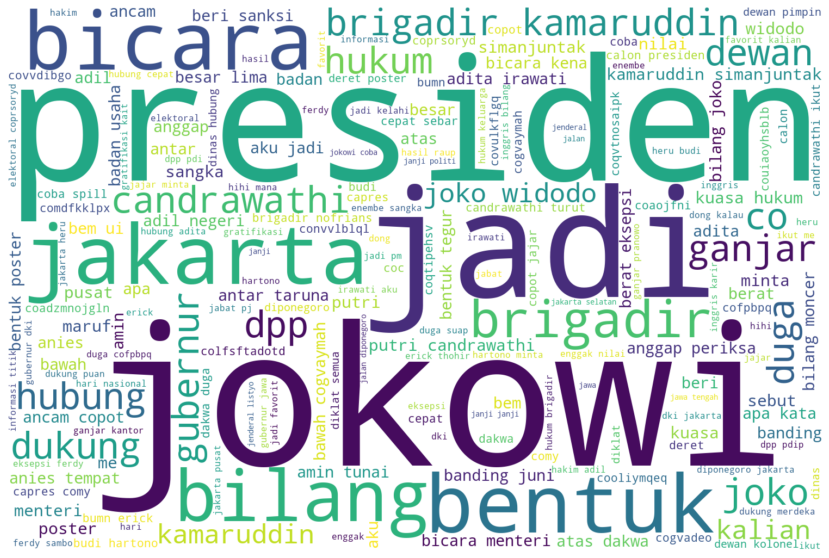

In [68]:
PlotWordCloud(d)

## cek non politik

In [69]:
npolitik_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
npolitik_tf_idf = npolitik_tf_idf_vect.fit_transform(npolitik_reviews["ProcessedText"].values)

In [70]:
npolitik_tf_idf.shape

(79, 1469)

In [71]:
features = npolitik_tf_idf_vect.get_feature_names()
idfValues = npolitik_tf_idf_vect.idf_
d = dict(zip(features, 9 - idfValues))
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)
for i in range(100):
    print(sortedDict[i])

('laku', 5.920558458320164)
('sebut', 5.920558458320164)
('jadi', 5.815197942662338)
('orang', 5.697414907005954)
('co', 5.563883514381432)
('istana', 5.409732834554173)
('kata', 5.409732834554173)
('tak', 5.409732834554173)
('bpom', 5.227411277760218)
('dalam', 5.227411277760218)
('gagal', 5.227411277760218)
('kepala', 5.227411277760218)
('lalu', 5.227411277760218)
('obat', 5.227411277760218)
('perintah', 5.227411277760218)
('terobos', 5.227411277760218)
('terobos istana', 5.227411277760218)
('yang', 5.227411277760218)
('ada', 5.00426772644601)
('aku', 5.00426772644601)
('akut', 5.00426772644601)
('alami', 5.00426772644601)
('bakar', 5.00426772644601)
('bawa', 5.00426772644601)
('beberapa', 5.00426772644601)
('diri', 5.00426772644601)
('duga', 5.00426772644601)
('gagal ginjal', 5.00426772644601)
('ginjal', 5.00426772644601)
('ginjal akut', 5.00426772644601)
('guna', 5.00426772644601)
('indonesia', 5.00426772644601)
('insiden', 5.00426772644601)
('istana negara', 5.00426772644601)
('jo

In [72]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

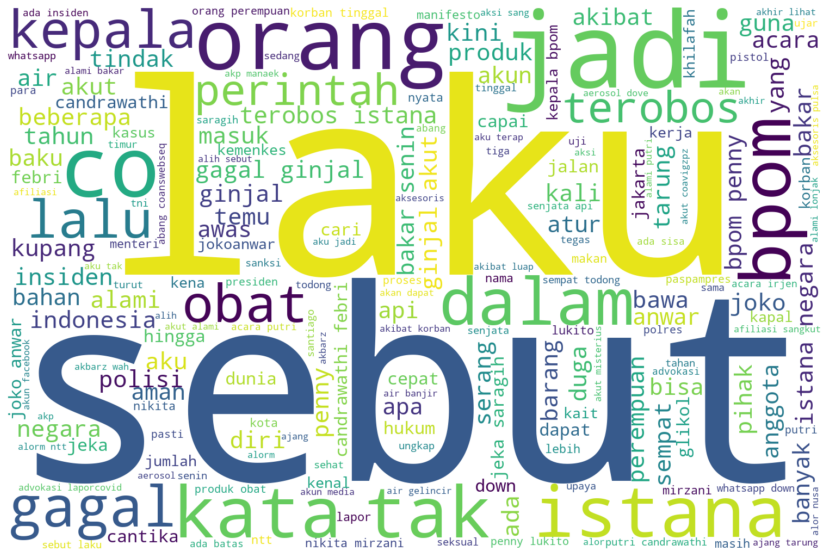

In [73]:
PlotWordCloud(d)

## cek politik dan non politik semua label

In [74]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [75]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [76]:
Data_TFIDF.shape

(98, 1841)

## Training dan testing data 70-30

In [77]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score 
from sklearn.model_selection import train_test_split

In [78]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [79]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((68,), (30,), (68,), (30,))

## model Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [81]:
parameters_nb = {
    'tfidf__ngram_range' : [(1,1), (1,2), (1,3), (1,4)],
    'model__alpha' : (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [82]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)


In [83]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

## Nilai Accuracy Training Set dan Test Set

In [84]:
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.7333333333333333


## Nilai Recall Training Set dan Test Set

In [85]:
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.7333333333333333


## Nilai Precision Training Set dan Test Set

In [86]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.7333333333333333


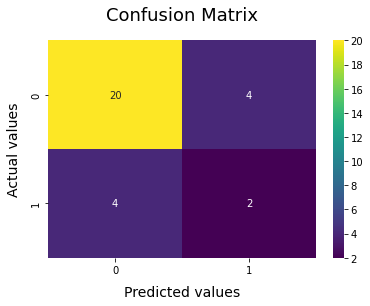

In [87]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

## Visualisasi

In [88]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [89]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.733333


In [90]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [91]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.733333,0.733333,0.733333


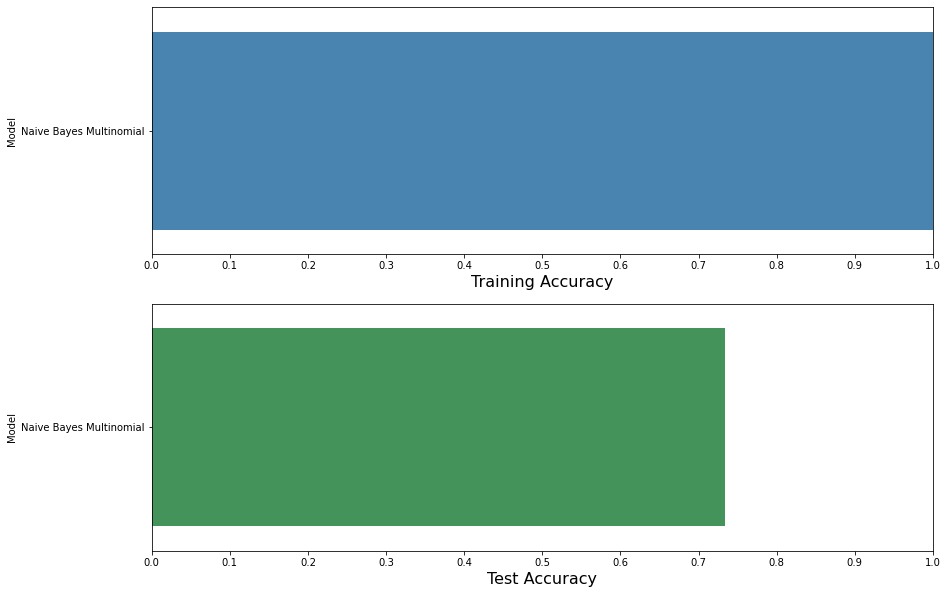

In [92]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Kesimpulan :
dari hasil proses pengujian diatas dapat disimpulkan bahwa data training memiliki tingkat akurasi sebanyak 1.0, sedangkan data testing dengan nilai 0.73